# NFL Defense Data Nunnelee Notebook

This competition uses NFL’s Next Gen Stats data, which includes the position and speed of every player on the field during each play. We'll employ player tracking data for all drop-back pass plays from the 2018 regular season. The goal of submissions is to identify unique and impactful approaches to measure defensive performance on these plays. There are several different directions for participants to utilize —which may require levels of football savvy, data aptitude, and creativity. As examples:

* What are coverage schemes (man, zone, etc) that the defense employs? What coverage options tend to be better performing?
* Which players are the best at closely tracking receivers as they try to get open?
* Which players are the best at closing on receivers when the ball is in the air?
* Which players are the best at defending pass plays when the ball arrives?
* Is there any way to use player tracking data to predict whether or not certain penalties – for example, defensive pass interference – will be called?
* Who are the NFL’s best players against the pass?
* How does a defense react to certain types of offensive plays?
* Is there anything about a player – for example, their height, weight, experience, speed, or position – that can be used to predict their performance on defense?
* What does data tell us about defending the pass play?

# Evaulation
The challenge is to generate actionable, practical, and novel insights from player tracking data that corresponds to defensive backs. Suggestions made here represent some of the approaches that football coaches are currently thinking of, but there undoubtedly several others.

An entry to the competition consists of a Notebook submission that is evaluated on the following five components, where 0 is the low score and 10 is the high score.

Note: All notebooks submitted must be made public on or before the submission deadline to be eligible.

Open Competition: The first aim takes on what an NFL defense does once a quarterback drops back to pass. This includes coverage schemes (typically man versus zone), how players (often termed “secondary” defenders) disrupt and prevent the offense from completing passes, and how, once the ball is in the air, the defense works to ensure that a pass falls incomplete.

## Big Data Bowl 2021 scoring sheet
Submissions will be judged by the NFL based on how well they address:

Innovation:

Are the proposed findings actionable?
Is this a way of looking at tracking data that is novel?
Is this project creative?
Accuracy:

Is the work correct?
Are claims backed up by data?
Are the statistical models appropriate given the data?
Relevance:

Would NFL teams (or the league office) be able to use these results on a week-to-week basis?
Does the analysis account for variables that make football data complex?
Clarity:

Evaluate the writing with respect to how clear the writer(s) make findings.
Data visualization/tables:

Are the charts and tables provided accessible, interesting, visually appealing, and accurate?

Notebooks should consist of no more than 2,000 words and no more than 7 tables/figures. Submissions will not be penalized for any number of words or figures under this limit. Participants are encouraged to show statistical code if it helps readers better understand their analyses; most, if not all code, however, should be hidden in the Appendix.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nfl-big-data-bowl-2021/week11.csv
/kaggle/input/nfl-big-data-bowl-2021/week14.csv
/kaggle/input/nfl-big-data-bowl-2021/week12.csv
/kaggle/input/nfl-big-data-bowl-2021/week9.csv
/kaggle/input/nfl-big-data-bowl-2021/week16.csv
/kaggle/input/nfl-big-data-bowl-2021/week10.csv
/kaggle/input/nfl-big-data-bowl-2021/week7.csv
/kaggle/input/nfl-big-data-bowl-2021/week17.csv
/kaggle/input/nfl-big-data-bowl-2021/week1.csv
/kaggle/input/nfl-big-data-bowl-2021/week15.csv
/kaggle/input/nfl-big-data-bowl-2021/week4.csv
/kaggle/input/nfl-big-data-bowl-2021/week13.csv
/kaggle/input/nfl-big-data-bowl-2021/games.csv
/kaggle/input/nfl-big-data-bowl-2021/plays.csv
/kaggle/input/nfl-big-data-bowl-2021/week2.csv
/kaggle/input/nfl-big-data-bowl-2021/players.csv
/kaggle/input/nfl-big-data-bowl-2021/week5.csv
/kaggle/input/nfl-big-data-bowl-2021/week6.csv
/kaggle/input/nfl-big-data-bowl-2021/week8.csv
/kaggle/input/nfl-big-data-bowl-2021/week3.csv


# Preparing the tools
We're going to use Matplotlib, as well as Numpy and Pandas

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load the data

In [3]:
df_wk1 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/week1.csv')
df_wk1.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.73,26.67,0.00,0.01,0.02,289.57,240.93,None,310.0,Matt Ryan,2.0,QB,1,away,2018090600,75,left,NaN
1,2018-09-07T01:07:14.599Z,88.89,36.47,0.01,0.01,0.01,105.63,66.66,None,79848.0,Malcolm Jenkins,27.0,SS,1,home,2018090600,75,left,NaN
2,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.599Z,86.31,22.01,0.09,0.42,0.01,70.12,168.91,None,2495613.0,Corey Graham,24.0,FS,1,home,2018090600,75,left,NaN
4,2018-09-07T01:07:14.599Z,90.78,36.15,0.00,0.00,0.00,257.61,193.97,None,2533040.0,Mohamed Sanu,12.0,WR,1,away,2018090600,75,left,HITCH


In [4]:
df_wk1.tail()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
986017,2018-09-11T05:29:39.900Z,33.68,43.14,1.96,3.79,0.22,281.35,309.70,None,2556277.0,Marqui Christian,41.0,SS,65,away,2018091001,4192,left,NaN
986018,2018-09-11T05:29:39.900Z,36.02,40.21,0.81,1.52,0.09,308.07,234.06,None,2556593.0,Cory Littleton,58.0,ILB,65,away,2018091001,4192,left,NaN
986019,2018-09-11T05:29:39.900Z,33.02,43.81,2.63,4.57,0.27,183.83,314.39,None,2556885.0,Jalen Richard,30.0,RB,65,home,2018091001,4192,left,SCREEN
986020,2018-09-11T05:29:39.900Z,34.13,40.86,0.15,0.72,0.02,6.17,267.87,None,2558183.0,John Johnson,43.0,SS,65,away,2018091001,4192,left,NaN
986021,2018-09-11T05:29:39.900Z,33.29,43.92,1.81,4.24,0.20,NaN,NaN,None,NaN,Football,NaN,NaN,65,football,2018091001,4192,left,NaN


In [5]:
df_plays = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/plays.csv')
df_plays.head()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
0,2018090600,75,(15:00) M.Ryan pass short right to J.Jones pus...,1,1,15,ATL,play_type_pass,ATL,20,...,0.0,15:00:00,90.0,NaN,NaN,C,10,10,0.261827,False
1,2018090600,146,(13:10) M.Ryan pass incomplete short right to ...,1,1,10,ATL,play_type_pass,PHI,39,...,0.0,13:10:00,49.0,NaN,NaN,I,0,0,-0.372360,False
2,2018090600,168,(13:05) (Shotgun) M.Ryan pass incomplete short...,1,2,10,ATL,play_type_pass,PHI,39,...,0.0,13:05:00,49.0,NaN,NaN,I,0,0,-0.702779,False
3,2018090600,190,(13:01) (Shotgun) M.Ryan pass deep left to J.J...,1,3,10,ATL,play_type_pass,PHI,39,...,0.0,13:01:00,49.0,NaN,NaN,C,33,33,3.047530,False
4,2018090600,256,(10:59) (Shotgun) M.Ryan pass incomplete short...,1,3,1,ATL,play_type_pass,PHI,1,...,0.0,10:59:00,11.0,NaN,NaN,I,0,0,-0.842272,False


In [6]:
df_plays.tail()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
19234,2018122200,2300,(7:53) J.Johnson pass incomplete short left [K...,3,2,5,WAS,play_type_unknown,WAS,31,...,NaN,NaN,NaN,DH,TEN 24,I,0,5,0.848703,False
19235,2018122200,3177,(6:53) (Shotgun) B.Gabbert pass incomplete sho...,4,3,7,TEN,play_type_unknown,WAS,37,...,NaN,NaN,NaN,DH,WAS 31,I,0,5,1.227695,False
19236,2018122201,566,(5:32) (Shotgun) P.Rivers pass deep right to K...,1,3,4,LAC,play_type_unknown,LAC,49,...,NaN,NaN,NaN,OPI,LAC 13,C,27,-10,-0.720168,False
19237,2018122201,1719,(1:08) P.Rivers pass incomplete deep middle to...,2,3,1,LAC,play_type_unknown,LAC,48,...,NaN,NaN,NaN,DPI,BAL 23,I,0,15,1.336078,True
19238,2018122201,2649,(7:16) (Shotgun) L.Jackson pass incomplete sho...,3,1,10,BAL,play_type_unknown,LAC,49,...,NaN,NaN,NaN,DPI,LAC 43,I,0,9,0.550256,True


In [7]:
df_players = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2021/players.csv')
df_players.head()

,nflId,height,weight,birthDate,collegeName,position,displayName
0,2539334,72,190,1990-09-10,Washington,CB,Desmond Trufant
1,2539653,70,186,1988-11-01,Southeastern Louisiana,CB,Robert Alford
2,2543850,69,186,1991-12-18,Purdue,SS,Ricardo Allen
3,2555162,73,227,1994-11-04,Louisiana State,MLB,Deion Jones
4,2555255,75,232,1993-07-01,Minnesota,OLB,De'Vondre Campbell


In [8]:
df_players.tail()

,nflId,height,weight,birthDate,collegeName,position,displayName
1298,2553798,6-2,235,09/17/1991,Vanderbilt,LS,Andrew East
1299,2556814,6-2,200,05/17/1994,Duke,WR,Max McCaffrey
1300,2552576,78,231,1992-04-25,Oregon State,QB,Sean Mannion
1301,2561469,69,187,1993-03-15,Alabama-Birmingham,CB,Darious Williams
1302,2558095,6-2,196,10/12/1995,LSU,WR,Malachi Dupre


In [9]:
df_wk1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986022 entries, 0 to 986021
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   time           986022 non-null  object 
 1   x              986022 non-null  float64
 2   y              986022 non-null  float64
 3   s              986022 non-null  float64
 4   a              986022 non-null  float64
 5   dis            986022 non-null  float64
 6   o              919109 non-null  float64
 7   dir            919109 non-null  float64
 8   event          986022 non-null  object 
 9   nflId          919109 non-null  float64
 10  displayName    986022 non-null  object 
 11  jerseyNumber   919109 non-null  float64
 12  position       919109 non-null  object 
 13  frameId        986022 non-null  int64  
 14  team           986022 non-null  object 
 15  gameId         986022 non-null  int64  
 16  playId         986022 non-null  int64  
 17  playDirection  986022 non-nul

In [10]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  object 
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  object 
 7   playType                19239 non-null  object 
 8   yardlineSide            18985 non-null  object 
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19098 non-null  object 
 11  personnelO              19210 non-null  object 
 12  defendersInTheBox       19177 non-null  float64
 13  numberOfPassRushers     18606 non-null  float64
 14  personnelD              19210 non-null

In [11]:
df_plays.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
playType                      0
yardlineSide                254
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox            62
numberOfPassRushers         633
personnelD                   29
typeDropback                639
preSnapVisitorScore         639
preSnapHomeScore            639
gameClock                   639
absoluteYardlineNumber      639
penaltyCodes              18033
penaltyJerseyNumbers      18033
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
isDefensivePI                 0
dtype: int64

## Convert string into categories
One way we can turn all of our data into numbers is by converting them into pandas categories

In [12]:
# Find the columns wich contain strings
for label, content in df_plays.items():
    if pd.api.types.is_string_dtype(content):
        df_plays[label] = content.astype("category").cat.as_ordered()

In [13]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   gameId                  19239 non-null  int64   
 1   playId                  19239 non-null  int64   
 2   playDescription         19239 non-null  category
 3   quarter                 19239 non-null  int64   
 4   down                    19239 non-null  int64   
 5   yardsToGo               19239 non-null  int64   
 6   possessionTeam          19239 non-null  category
 7   playType                19239 non-null  category
 8   yardlineSide            18985 non-null  category
 9   yardlineNumber          19239 non-null  int64   
 10  offenseFormation        19098 non-null  category
 11  personnelO              19210 non-null  category
 12  defendersInTheBox       19177 non-null  float64 
 13  numberOfPassRushers     18606 non-null  float64 
 14  personnelD            

In [14]:
df_plays.passResult.cat.categories

Index(['C', 'I', 'IN', 'R', 'S'], dtype='object')

In [15]:
df_plays.passResult.cat.codes

0        0
1        1
2        1
3        0
4        1
        ..
19234    1
19235    1
19236    0
19237    1
19238    1
Length: 19239, dtype: int8

In [16]:
# Check the missing data
df_plays.isnull().sum()/len(df_plays)

gameId                    0.000000
playId                    0.000000
playDescription           0.000000
quarter                   0.000000
down                      0.000000
yardsToGo                 0.000000
possessionTeam            0.000000
playType                  0.000000
yardlineSide              0.013202
yardlineNumber            0.000000
offenseFormation          0.007329
personnelO                0.001507
defendersInTheBox         0.003223
numberOfPassRushers       0.032902
personnelD                0.001507
typeDropback              0.033214
preSnapVisitorScore       0.033214
preSnapHomeScore          0.033214
gameClock                 0.033214
absoluteYardlineNumber    0.033214
penaltyCodes              0.937315
penaltyJerseyNumbers      0.937315
passResult                0.000104
offensePlayResult         0.000000
playResult                0.000000
epa                       0.000000
isDefensivePI             0.000000
dtype: float64

In [17]:
df_plays.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
playType                      0
yardlineSide                254
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox            62
numberOfPassRushers         633
personnelD                   29
typeDropback                639
preSnapVisitorScore         639
preSnapHomeScore            639
gameClock                   639
absoluteYardlineNumber      639
penaltyCodes              18033
penaltyJerseyNumbers      18033
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
isDefensivePI                 0
dtype: int64

## Fill the missing values first¶
Fill numerical values first

In [18]:
for label, content in df_plays.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

gameId
playId
quarter
down
yardsToGo
yardlineNumber
defendersInTheBox
numberOfPassRushers
preSnapVisitorScore
preSnapHomeScore
absoluteYardlineNumber
offensePlayResult
playResult
epa
isDefensivePI


In [19]:
# Check for which numeric columns have null values
for label, content in df_plays.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

defendersInTheBox
numberOfPassRushers
preSnapVisitorScore
preSnapHomeScore
absoluteYardlineNumber


In [20]:
# Fill numeric rows with the median
for label, content in df_plays.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells is the data is missing or not
            # df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill the missing numeric values with median
            df_plays[label] = content.fillna(content.median())

In [21]:
# Check if there's any null numeric values
for label, content in df_plays.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [22]:
df_plays.isna().sum()

gameId                        0
playId                        0
playDescription               0
quarter                       0
down                          0
yardsToGo                     0
possessionTeam                0
playType                      0
yardlineSide                254
yardlineNumber                0
offenseFormation            141
personnelO                   29
defendersInTheBox             0
numberOfPassRushers           0
personnelD                   29
typeDropback                639
preSnapVisitorScore           0
preSnapHomeScore              0
gameClock                   639
absoluteYardlineNumber        0
penaltyCodes              18033
penaltyJerseyNumbers      18033
passResult                    2
offensePlayResult             0
playResult                    0
epa                           0
isDefensivePI                 0
dtype: int64

# Filling and turning categorical variables into numbers

In [23]:
# Check for columns which aren't numeric
for label, content in df_plays.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        # df_plays[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_plays[label] = pd.Categorical(content).codes+1

In [24]:
df_plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19239 non-null  int64  
 1   playId                  19239 non-null  int64  
 2   playDescription         19239 non-null  int16  
 3   quarter                 19239 non-null  int64  
 4   down                    19239 non-null  int64  
 5   yardsToGo               19239 non-null  int64  
 6   possessionTeam          19239 non-null  int8   
 7   playType                19239 non-null  int8   
 8   yardlineSide            19239 non-null  int8   
 9   yardlineNumber          19239 non-null  int64  
 10  offenseFormation        19239 non-null  int8   
 11  personnelO              19239 non-null  int8   
 12  defendersInTheBox       19239 non-null  float64
 13  numberOfPassRushers     19239 non-null  float64
 14  personnelD              19239 non-null

In [25]:
df_plays.head().T

,0,1,2,3,4
gameId,2018090600,2018090600,2018090600,2018090600,2018090600
playId,75,146,168,190,256
playDescription,5692,3553,3469,3392,1093
quarter,1,1,1,1,1
down,1,1,2,3,3
yardsToGo,15,10,10,10,1
possessionTeam,2,2,2,2,2
playType,1,1,1,1,1
yardlineSide,2,26,26,26,26
yardlineNumber,20,39,39,39,1


In [26]:
df_plays.isna().sum()

gameId                    0
playId                    0
playDescription           0
quarter                   0
down                      0
yardsToGo                 0
possessionTeam            0
playType                  0
yardlineSide              0
yardlineNumber            0
offenseFormation          0
personnelO                0
defendersInTheBox         0
numberOfPassRushers       0
personnelD                0
typeDropback              0
preSnapVisitorScore       0
preSnapHomeScore          0
gameClock                 0
absoluteYardlineNumber    0
penaltyCodes              0
penaltyJerseyNumbers      0
passResult                0
offensePlayResult         0
playResult                0
epa                       0
isDefensivePI             0
dtype: int64

In [29]:
# Split Data into X and y
X = df_plays.drop("passResult", axis=1)

y = df_plays["passResult"]

In [33]:
y[:20]

0     1
1     2
2     2
3     1
4     2
5     1
6     2
7     2
8     1
9     1
10    2
11    2
12    1
13    5
14    5
15    2
16    1
17    1
18    1
19    1
Name: passResult, dtype: int8

In [34]:
# Split data into train and validation sets
np.random.seed(42)

# Split into train & test set
X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [35]:
X_train

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapVisitorScore,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,offensePlayResult,playResult,epa,isDefensivePI
16847,2018122302,176,2099,1,3,6,19,1,19,38,...,0.0,0.0,715,72.0,0,0,20,20,2.717626,False
17895,2018123008,2822,11361,3,1,10,23,1,23,27,...,21.0,10.0,295,37.0,0,0,0,0,-0.549824,False
18474,2018123014,3396,7424,3,2,18,29,1,29,17,...,17.0,45.0,118,93.0,0,0,6,6,-0.338715,False
15496,2018121602,461,11859,1,2,12,11,1,11,40,...,0.0,0.0,320,50.0,0,0,5,5,-0.569815,False
12367,2018112500,743,10834,1,1,10,25,1,25,25,...,7.0,3.0,269,35.0,0,0,0,0,-0.552892,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2018111803,3300,14315,4,1,10,11,2,0,50,...,13.0,13.0,447,60.0,0,0,-5,-5,-0.747137,False
11964,2018112201,354,17157,1,2,10,32,1,32,25,...,0.0,7.0,598,35.0,0,0,9,9,-0.290633,False
5390,2018100702,2880,3704,4,3,16,19,1,19,13,...,17.0,10.0,801,97.0,0,0,18,18,2.962418,False
860,2018091000,1186,1154,2,2,20,11,1,24,43,...,10.0,7.0,663,53.0,0,0,5,5,-0.309974,False


In [36]:
y_train, len(y_train)

(16847    1
 17895    2
 18474    1
 15496    1
 12367    2
         ..
 11284    5
 11964    1
 5390     1
 860      1
 15795    1
 Name: passResult, Length: 15391, dtype: int8,
 15391)

# Modelling
Now we've got our data into training and validation sets, it's time to build the model.

We'll train it (find the patterns) on the training set.

And we'll validate it (use the patterns) on the test set.

In [44]:
from sklearn.linear_model import SGDClassifier
 
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=4000)
clf.fit(X, y)

clf.score(X, y)

0.5909870575393732

In [45]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X, y)

xgb_model.score(X, y)

0.9996881334788711

In [47]:
# Let's try RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X, y)

rf.score(X, y)

0.9672540152814595

In [48]:
# Make a correlation matrix
df_plays.corr()

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,playType,yardlineSide,yardlineNumber,...,preSnapHomeScore,gameClock,absoluteYardlineNumber,penaltyCodes,penaltyJerseyNumbers,passResult,offensePlayResult,playResult,epa,isDefensivePI
gameId,1.000000,0.003860,-0.000294,-0.011807,0.014600,0.011798,0.010160,0.007923,0.013795,0.013766,...,-0.035054,0.000013,0.010452,0.007324,0.003916,0.009677,-0.019115,-0.020257,-0.011386,0.005246
playId,0.003860,1.000000,0.126269,0.955037,0.013178,0.012832,-0.029372,0.008951,-0.017543,-0.001816,...,0.688098,-0.246190,0.001334,0.013712,0.010140,0.023067,-0.012455,-0.012120,-0.018480,0.005769
playDescription,-0.000294,0.126269,1.000000,0.000401,0.000707,-0.008427,-0.002975,0.000552,-0.013974,-0.030136,...,0.080383,-0.493191,0.022558,-0.001914,-0.005300,0.018412,-0.016877,-0.016689,-0.003017,-0.004102
quarter,-0.011807,0.955037,0.000401,1.000000,0.021050,0.015270,-0.019853,0.009716,-0.005980,-0.000274,...,0.639407,-0.018279,0.001945,0.012938,0.009719,0.019891,-0.009974,-0.011267,-0.019915,0.003582
down,0.014600,0.013178,0.000707,0.021050,1.000000,-0.276123,0.005840,0.069637,0.000978,-0.020232,...,-0.008049,0.010022,0.002799,0.034630,0.038754,0.100143,-0.063911,-0.066480,-0.056965,0.014154
yardsToGo,0.011798,0.012832,-0.008427,0.015270,-0.276123,1.000000,-0.008848,-0.019453,-0.003019,0.066594,...,0.004395,0.020465,-0.002536,0.007322,-0.018127,-0.017233,0.040389,0.039519,-0.092148,-0.012971
possessionTeam,0.010160,-0.029372,-0.002975,-0.019853,0.005840,-0.008848,1.000000,0.004408,0.538337,-0.012864,...,-0.018104,0.007766,0.029239,0.004568,0.044944,-0.005230,0.021195,0.017205,0.013790,-0.000607
playType,0.007923,0.008951,0.000552,0.009716,0.069637,-0.019453,0.004408,1.000000,0.005559,0.001192,...,-0.032088,-0.215298,-0.000242,0.313139,0.491851,0.565113,-0.265803,-0.174054,-0.079825,0.467930
yardlineSide,0.013795,-0.017543,-0.013974,-0.005980,0.000978,-0.003019,0.538337,0.005559,1.000000,-0.055628,...,-0.018926,0.012883,0.009254,-0.000037,0.062004,0.000143,0.012782,0.012591,0.009222,0.004732
yardlineNumber,0.013766,-0.001816,-0.030136,-0.000274,-0.020232,0.066594,-0.012864,0.001192,-0.055628,1.000000,...,0.020321,0.013806,0.004626,0.000295,-0.010490,0.001041,0.072679,0.074692,-0.036261,-0.003291


(27.5, -0.5)

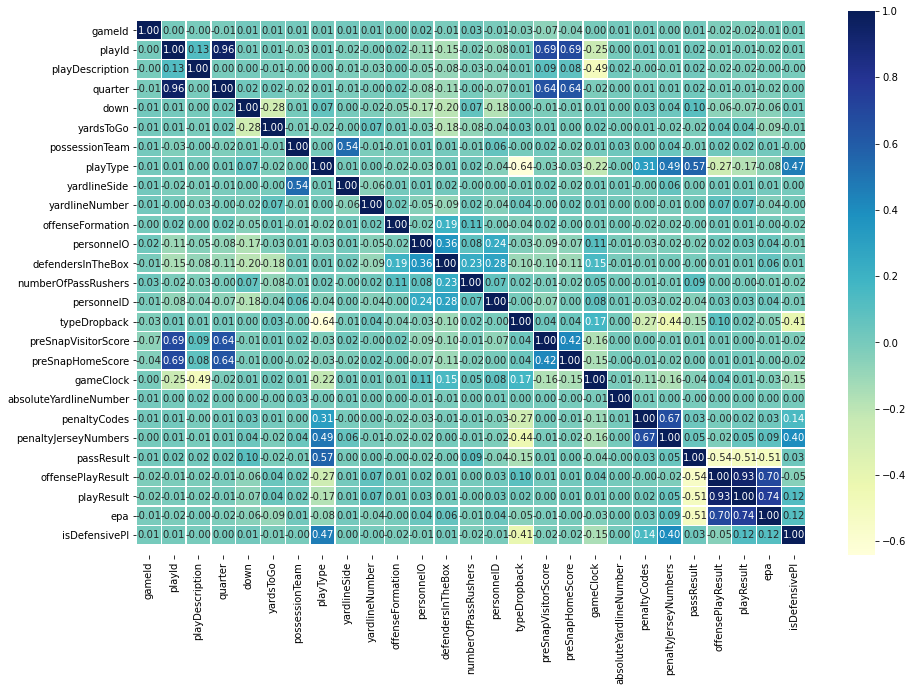

In [49]:
# Let's make our correlation matrix a little prettier
corr_matrix = df_plays.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Tuning and preference

In [52]:
%%time
# Instantiate model
model = RandomForestClassifier(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(X_train, y_train)

CPU times: user 3.46 s, sys: 55.2 ms, total: 3.51 s
Wall time: 1.14 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [53]:
# Score the model
model.score(X_train, y_train)

1.0

In [54]:
model.fit(X_val, y_val)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [56]:
model.score(X_val, y_val)

1.0

In [57]:
# Re-Create an evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and True labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, val_preds),
             "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_val, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_val, val_preds)}
    return scores

In [58]:
show_scores(model)

{'Training MAE': 0.019037099603664478,
 'Valid MAE': 0.0,
 'Training RMSLE': 0.0531,
 'Valid RMSLE': 0.0,
 'Training R^2': 0.9787702447596505,
 'Valid R^2': 1.0}

In [59]:
model.feature_importances_

array([0.00438159, 0.00679018, 0.00792843, 0.00181039, 0.00517072,
       0.00583552, 0.00534482, 0.09128743, 0.00467189, 0.00515592,
       0.00256404, 0.0022243 , 0.00296875, 0.00239158, 0.00341225,
       0.01563473, 0.00396219, 0.00385016, 0.01390578, 0.00498825,
       0.00606471, 0.00603836, 0.40152791, 0.25206855, 0.13722137,
       0.00280018])

In [60]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=6):
    df_plays = (pd.DataFrame({"features": columns,
                       "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df_plays["features"][:n], df_plays["feature_importances"][:6])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

NameError: name 'df2' is not defined

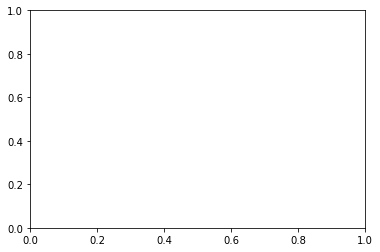

In [61]:
plot_features(X_train.columns, model.feature_importances_)